# Prérequis
0. Installation des libairies necessaire pour le développement

In [96]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Récupération d'un ensemble de données d'IRM cérébrale
Source : https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

# Importation des bibliothèques

In [97]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset 
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2

## Lire les images IRM 

In [109]:
def load_images(directory, img_size=(128, 128)):
    images = []
    path = f'{directory}/*.[jJ][pP][gG]'
    
    for file in glob.iglob(path):
        try:
            # Read and resize image
            img = cv2.imread(file)
            if img is None:
                print(f"Warning: Could not read image {file}")
                continue
                
            img = cv2.resize(img, img_size)
            
            # Convert BGR to RGB (OpenCV loads as BGR by default)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            images.append(img)
        except Exception as e:
            print(f"Error processing {file}: {e}")
    
    return images

# Load tumor and healthy brain images
tumor = load_images('data/brain_tumor_dataset/yes')
healthy = load_images('data/brain_tumor_dataset/no')

print(f"Loaded {len(tumor)} tumor images and {len(healthy)} healthy images")

Loaded 154 tumor images and 97 healthy images


In [110]:
tumor = np.array(tumor)
healthy = np.array(healthy)

tumor_and_healthy = np.concatenate((healthy, tumor))

In [113]:
healthy.shape
# (amount_of_files, width, height, channel) -> Each channel has a width and height of 128x128 

(97, 128, 128, 3)

## Visualiser les images IRM 

In [127]:
def plot_random(healthy, tumor, num=5):
    # This generates 5(num) numbers from 0 to 96 with no dublicate
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]

    # Displaying healthy images
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Healthy')
        plt.imshow(healthy_imgs[i])

    # Displaying images with tumors
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Tumor')
        plt.imshow(tumor_imgs[i])

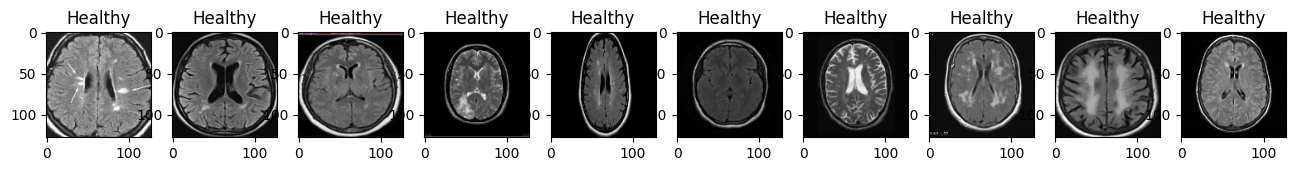

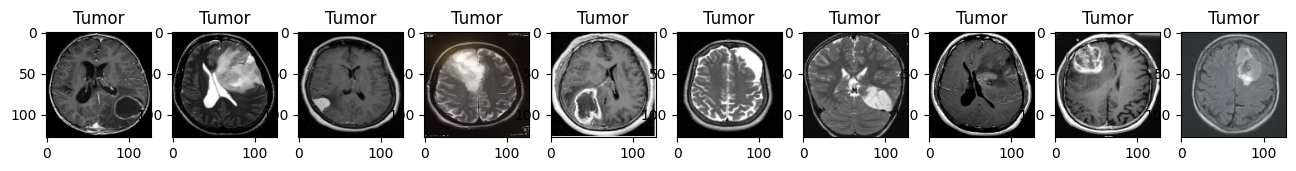

In [129]:
plot_random(healthy, tumor, 10)